In [2]:
cd desktop

/Users/shrey/Desktop


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np


df1=pd.read_excel ('qqabs.xlsx')
df2=pd.read_excel ('qqrxt.xlsx')



In [4]:
df1.energy

0       3.02
1       3.06
2       3.10
3       3.14
4       3.18
       ...  
521    23.86
522    23.90
523    23.94
524    23.98
525    24.02
Name: energy, Length: 526, dtype: float64

In [6]:
df1['modelq'] = np.cumsum(df1['model'])
df1['dataq'] = np.cumsum(df1['data'])
df2['modelq'] = np.cumsum(df2['model'])
df2['dataq'] = np.cumsum(df2['data'])




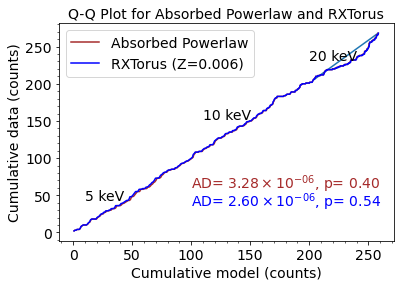

In [27]:
fig, ax = plt.subplots()


point1 = [204.240954 , 206]
point2 = [258.195744, 268 ]

x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values)
plt.plot((df1['modelq']),(df1['dataq']),color='brown',label='Absorbed Powerlaw')
plt.plot((df2['modelq']),(df2['dataq']) , color= 'blue',label='RXTorus (Z=0.006)')

plt.text(10 , 43, '5 keV')
plt.text(110 , 153 , '10 keV')
plt.text(200,   232 , '20 keV')
plt.xlabel('Cumulative model (counts)')
plt.ylabel('Cumulative data (counts)')
plt.rcParams.update({'font.size': 10})
SMALL_SIZE = 8
MEDIUM_SIZE = 14
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.title( 'Q-Q Plot for Absorbed Powerlaw and RXTorus')
plt.text(100 , 60 ,r'AD= $3.28\times10^{-06}$, p= 0.40',color='brown'  )
plt.text(100 , 35 ,r'AD= $2.60\times10^{-06}$, p= 0.54 ',color='blue'  )
plt.legend(loc = "upper left")
ax.minorticks_on()
ax.tick_params(axis='x', which='minor', direction='out')


plt.savefig('QQ.pdf',format='pdf',bbox_inches='tight',dpi=150)




In [21]:
df1

,energy,data,model,modelq,dataq
0,3.02,2,0.841522,0.841522,2
1,3.06,1,0.818542,1.660064,3
2,3.10,0,0.885368,2.545432,3
3,3.14,1,0.870321,3.415753,4
4,3.18,0,0.850573,4.266326,4
...,...,...,...,...,...
521,23.86,1,0.222426,257.234085,266
522,23.90,0,0.237173,257.471258,266
523,23.94,0,0.231926,257.703184,266
524,23.98,0,0.252617,257.955802,266


df1

In [16]:
df1

,energy,data,model
0,3.02,2,0.841522
1,3.06,1,0.818542
2,3.10,0,0.885368
3,3.14,1,0.870321
4,3.18,0,0.850573
...,...,...,...
521,23.86,1,0.222426
522,23.90,0,0.237173
523,23.94,0,0.231926
524,23.98,0,0.252617


In [17]:
A = df2.data
B = df2.model
C= df2.data
D = df2.model
import random 
idx = set(random.sample(range(len(A)), len(A)//2))
c = [a if i in idx else b for i,(a,b) in enumerate(zip(A, B))]
idx1 = set(random.sample(range(len(C)), len(C)//2))
d = [a if i in idx1 else b for i,(a,b) in enumerate(zip(C, D))]

In [18]:
def ADstat(data, model, staterror=None, syserror=None, weight=None):
    modelc = model.cumsum()
    datac = data.cumsum()
    maxmodelc = modelc.max()
    valid = np.logical_and(modelc > 0, maxmodelc - modelc > 0)
    modelc = modelc[valid] / maxmodelc
    datac = datac[valid] / datac.max()
    model = model[valid] / maxmodelc
    assert (modelc > 0).all(), ['ADstat has zero cumulative denominator', modelc]
    assert (maxmodelc - modelc > 0).all(), ['ADstat has zero=1-1 cumulative denominator', maxmodelc - modelc]
    ad = ((modelc - datac)**2 / (modelc * (maxmodelc - modelc)) * model).sum()
    return ad

In [24]:
Q=0
for i in range (1,2000):
    idx = set(random.sample(range(len(A)), len(A)//2)) #
    c = [a if i in idx else b for i,(a,b) in enumerate(zip(A, B))]
    idx1 = set(random.sample(range(len(C)), len(C)//2))
    d = [a if i in idx1 else b for i,(a,b) in enumerate(zip(C, D))]
    result=ADstat(np.array(c),np.array(d))
    if result > 2.6095998490490154e-06:
        Q=Q+1
print(Q/2000)

0.5395


In [21]:
ADstat(df2.data,df2.model)


2.6095998490490154e-06

In [130]:
ADstat(df2.data ,df2.model )

2.4274629858188847e-06

In [117]:
def CvMstat(data, model, staterror=None, syserror=None, weight=None):
    modelc = model.cumsum()
    datac = data.cumsum()
    maxmodelc = modelc.max()
    cvm = ((modelc / maxmodelc - datac / datac.max())**2 * model / maxmodelc).sum()
    return cvm, 0


In [118]:
P=0
for i in range (1,2000):
    idx = set(random.sample(range(len(A)), len(A)//2)) #
    c = [a if i in idx else b for i,(a,b) in enumerate(zip(A, B))]
    idx1 = set(random.sample(range(len(C)), len(C)//2))
    d = [a if i in idx1 else b for i,(a,b) in enumerate(zip(C, D))]
    result,_=CvMstat(np.array(c),np.array(d))
    if result > 0.00048349:
        P=P+1
print(P/2000)

0.2345


In [ ]:
print(P/2000)

In [ ]:
def ADstat(data, model, staterror=None, syserror=None, weight=None):
    modelc = model.cumsum()
    datac = data.cumsum()
    maxmodelc = modelc.max()
    valid = np.logical_and(modelc > 0, maxmodelc - modelc > 0)
    modelc = modelc[valid] / maxmodelc
    datac = datac[valid] / datac.max()
    model = model[valid] / maxmodelc
    assert (modelc > 0).all(), ['ADstat has zero cumulative denominator', modelc]
    assert (maxmodelc - modelc > 0).all(), ['ADstat has zero=1-1 cumulative denominator', maxmodelc - modelc]
    ad = ((modelc - datac)**2 / (modelc * (maxmodelc - modelc)) * model).sum()
    return ad



In [ ]:
ADstat(df4.data, df4.model)

In [ ]:
c

##### len(summodel)